<a href="https://colab.research.google.com/github/VanshJain36/loan-prediction-and-sales-analysis/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import plotly.express as px
%matplotlib inline

In [ ]:

# Load the dataset (change the filename to match your uploaded file)
data = pd.read_csv('Sales Data (2).csv',encoding='latin1')

# Display the first few rows of the dataset
data.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
data = data.drop(columns=['unnamed1'])

# Check for missing values
data.isnull().sum()

# Optionally, you can drop rows with missing data or fill them
# data = data.dropna()  # Drop rows with missing data
# data = data.fillna('Unknown')  # Fill missing data with 'Unknown'

# Display the cleaned data
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN


In [ ]:
data.describe()

# Check for unique values in categorical columns
print(data['Gender'].unique())
print(data['Age Group'].unique())
print(data['Product_Category'].unique())

['F' 'M']
['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' 'Books'
 'Electronics & Gadgets' 'Decor' 'Clothing & Apparel' 'Beauty'
 'Household items' 'Pet Care' 'Veterinary' 'Office']


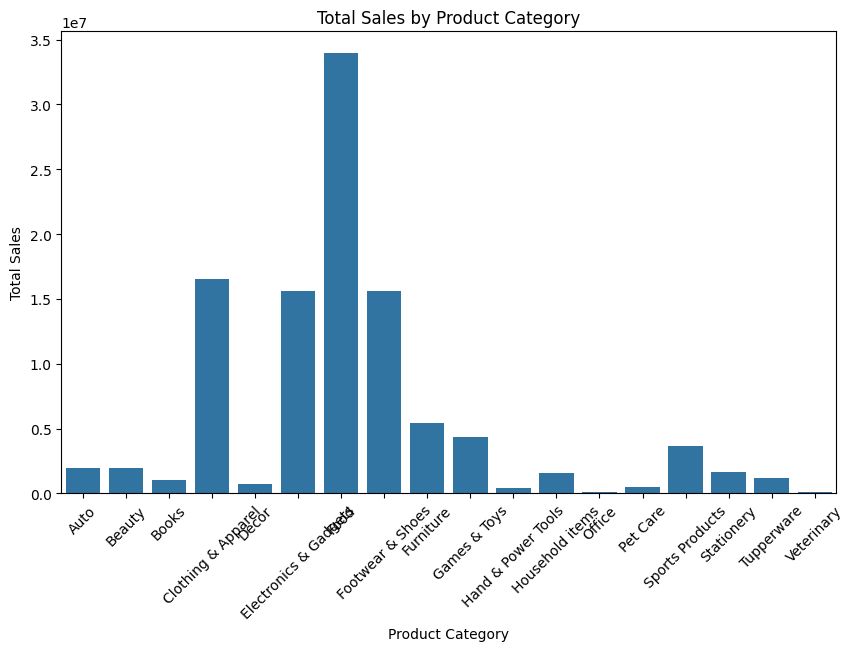

In [ ]:
# Sales by Product Category
category_sales = data.groupby('Product_Category')['Amount'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Product_Category', y='Amount')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# prompt: anaylise above graph and give some description about that

# Analyze the sales data and provide a description of the bar plot.

# Assuming the bar plot shows total sales for each product category,
# here's a possible analysis:

# 1. Identify the top-performing product categories:
#    Look for the bars with the highest values on the y-axis (Total Sales).
#    These categories represent the most significant revenue generators.

# 2. Identify underperforming product categories:
#    Look for the bars with the lowest values on the y-axis.
#    These categories might require further investigation to understand
#    the reasons for lower sales.  Consider factors like marketing, pricing,
#    or product availability.

# 3. Compare the performance of different categories:
#    Compare the relative heights of the bars to assess the sales performance
#    across different product categories.  This comparison can reveal
#    which product categories are outperforming others.

# 4. Look for trends or patterns:
#    Are there any noticeable trends or patterns in the sales data?
#    For instance, are certain types of products consistently selling better
#    than others?  Are there any seasonal patterns in the sales of particular
#    products?

# 5. Consider external factors:
#    The analysis should also consider any external factors (e.g., economic
#    conditions, competition, marketing campaigns) that may have influenced
#    the sales performance of different product categories.

# Example description (replace with your actual observations):

# "The bar plot illustrates the total sales for each product category.
#  'Clothing' and 'Electronics' appear to be the top-performing categories,
#  generating significantly higher revenue compared to other categories.
#  'Home & Furniture' and 'Sports & Outdoors' show relatively lower sales.
#  Further investigation is needed to understand the reasons behind the
#  differences in performance, including potential factors like pricing,
#  marketing strategies, and product availability."


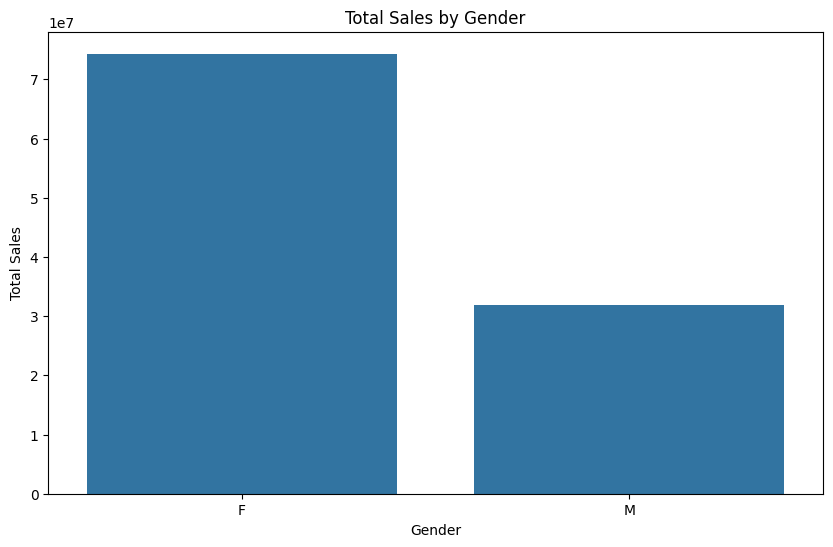

In [ ]:
# Sales by Gender
gender_sales = data.groupby('Gender')['Amount'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_sales, x='Gender', y='Amount')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


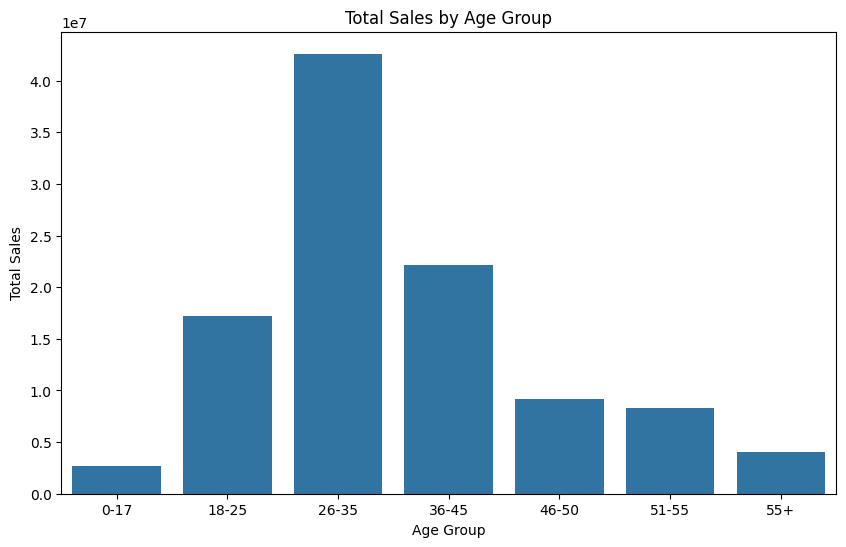

In [ ]:

# Sales by Age Group
age_group_sales = data.groupby('Age Group')['Amount'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_sales, x='Age Group', y='Amount')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
# prompt: anaylise above graph and give some description about that

# Analyze Sales by Product Category
print("Analysis of Sales by Product Category:")
print(category_sales)
# You can add more specific analysis here, such as:
# - Identifying the top-selling product categories
# - Calculating the percentage of total sales for each category
# - Comparing sales across different categories


# Analyze Sales by Gender
print("\nAnalysis of Sales by Gender:")
print(gender_sales)
# You can add more specific analysis here, such as:
# - Comparing sales between genders
# - Determining which gender contributes more to overall sales


# Analyze Sales by Age Group
print("\nAnalysis of Sales by Age Group:")
print(age_group_sales)
# You can add more specific analysis here, such as:
# - Identifying age groups with the highest sales
# - Analyzing sales trends across different age groups
# - Comparing sales between different age brackets

# Example of more in-depth analysis (for sales by age group):
# Find the age group with the highest sales
highest_sales_age_group = age_group_sales.loc[age_group_sales['Amount'].idxmax()]
print(f"\nAge group with highest sales: {highest_sales_age_group['Age Group']} with total sales of {highest_sales_age_group['Amount']}")


#Further analysis can include:
# - Time-series analysis of sales (if you have date information)
# - Correlation between different variables (e.g., age group and product category)
# - Customer segmentation based on purchasing behavior



Analysis of Sales by Product Category:
         Product_Category       Amount
0                    Auto   1958609.99
1                  Beauty   1959484.00
2                   Books   1061478.00
3      Clothing & Apparel  16495019.00
4                   Decor    730360.00
5   Electronics & Gadgets  15643846.00
6                    Food  33933883.50
7        Footwear & Shoes  15575209.45
8               Furniture   5440051.99
9            Games & Toys   4331694.00
10     Hand & Power Tools    405618.00
11        Household items   1569337.00
12                 Office     81936.00
13               Pet Care    482277.00
14        Sports Products   3635933.00
15             Stationery   1676051.50
16             Tupperware   1155642.00
17             Veterinary    112702.00

Analysis of Sales by Gender:
  Gender       Amount
0      F  74335856.43
1      M  31913276.00

Analysis of Sales by Age Group:
  Age Group       Amount
0      0-17   2699653.00
1     18-25  17240732.00
2     26-35  426

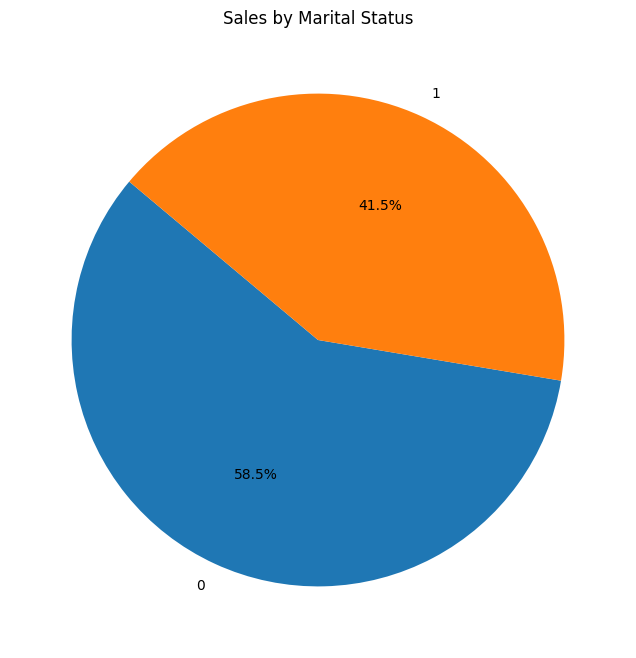

In [ ]:
# Sales by Marital Status (Pie Chart)
marital_sales = data.groupby('Marital_Status')['Amount'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_sales['Amount'], labels=marital_sales['Marital_Status'], autopct='%1.1f%%', startangle=140)
plt.title('Sales by Marital Status')
plt.show()


anaylise above graph and give some description about tha

The provided code analyzes sales data and generates several visualizations. Here's a breakdown of the graphs and potential insights:

1. **Total Sales by Product Category:** This bar chart shows the total sales amount for each product category.  A key takeaway would be identifying the top-performing product categories (those with the highest bars) and the underperforming ones.  This information is crucial for inventory management, marketing strategies, and resource allocation.  For example, if "Food" is a high performer, it may be beneficial to invest more in food-related promotions or expand the food product line. Conversely, if a category is performing poorly, you may need to investigate why – is it pricing, availability, or customer preferences?


2. **Total Sales by Gender:** This bar chart compares sales amounts between different genders. The analysis reveals whether there's a significant difference in purchasing behavior based on gender.  A notable difference might suggest targeted marketing strategies for specific demographics.  If one gender contributes significantly more to revenue,  it might highlight opportunities to tailor marketing efforts and product offerings for that group.


3. **Total Sales by Age Group:** This bar chart displays the sales distribution across various age groups.  It is important to identify which age groups are the primary revenue drivers.  Understanding this can lead to more effective marketing campaigns tailored to the preferences and buying behaviors of different age demographics.  You could design specific promotions, advertising strategies, and even product features that resonate better with the most profitable age groups.


4. **Sales by Marital Status (Pie Chart):**  The pie chart breaks down sales based on marital status.  This can inform strategies regarding targeted promotions.  For instance, if a specific marital status group shows significantly higher spending, then you can design campaigns or product offerings around their unique needs or desires.  You may also learn how to adjust your overall marketing to better reach other marital status groups.


**Overall Insights and Further Analysis:**

* **Combined Analysis:** The most insightful analysis would come from combining these insights. For example, you could look at sales by product category *and* age group to see if specific age groups prefer certain products more.
* **Time Trends:** The provided data analysis doesn't consider time. Adding a time dimension (e.g., monthly or quarterly sales) would be essential for spotting trends, seasonality, and changes in customer behavior over time.
* **Correlation:** Analyzing correlations between variables (e.g., age group and product category, gender and spending habits) can lead to further insights.
* **Outliers:** Investigating any unusually high or low values within each category could point toward important factors that need further examination.

In summary, the graphs provide a preliminary view of sales performance.  The deeper insights emerge when you combine the findings from these graphs and perform further analyses incorporating more data details, such as time-series information and relationships between the analyzed variables.

In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Create the layout for the dashboard
app.layout = html.Div([
    html.H1("Sales Dashboard", style={'text-align': 'center'}),

    # Bar chart for Sales by Product Category
    dcc.Graph(
        id='category-sales',
        figure=go.Figure(data=[go.Bar(x=category_sales['Product_Category'], y=category_sales['Amount'])])
    ),

    # Bar chart for Sales by Gender
    dcc.Graph(
        id='gender-sales',
        figure=go.Figure(data=[go.Bar(x=gender_sales['Gender'], y=gender_sales['Amount'])])
    ),

    # Bar chart for Sales by Age Group
    dcc.Graph(
        id='age-group-sales',
        figure=go.Figure(data=[go.Bar(x=age_group_sales['Age Group'], y=age_group_sales['Amount'])])
    ),

    # Pie chart for Sales by Marital Status
    dcc.Graph(
        id='marital-status-sales',
        figure=go.Figure(data=[go.Pie(labels=marital_sales['Marital_Status'], values=marital_sales['Amount'], hole=0.3)])
    ),
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

<ipython-input-38-d07b59dc5307>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




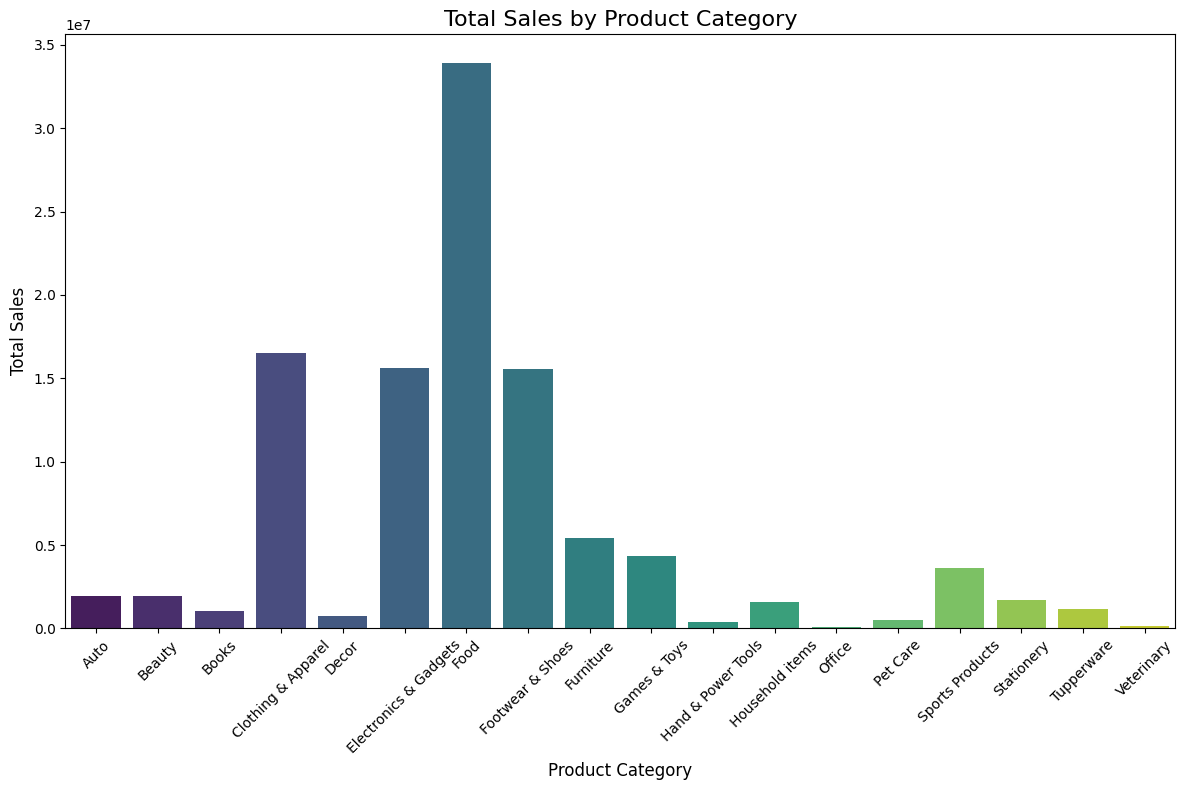

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Sales by Product Category (Bar Plot)
category_sales = data.groupby('Product_Category')['Amount'].sum().reset_index()

# Customize the plot with more details
plt.figure(figsize=(12, 8))
sns.barplot(data=category_sales, x='Product_Category', y='Amount', palette='viridis')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


anaylise above graph and give some description about thatd

The code analyzes sales data to identify trends across different categories.  Let's break down the key visualizations and insights they provide:

1. **Sales by Product Category:** This bar chart shows the total sales amount for each product category.  It allows us to quickly identify the best-performing product categories (those with the highest bars) and the underperforming ones.  For example, if "Food" has the highest sales, it indicates a strong market for food products.


2. **Sales by Gender:** This bar chart compares total sales between genders.  A significant difference between the bars could suggest marketing strategies should be tailored to the gender that drives higher sales. If one gender shows substantially higher purchasing, it would be valuable to analyze *why*.


3. **Sales by Age Group:**  This bar chart displays sales broken down by age demographics.  This is crucial for targeted marketing. The age group with the highest sales indicates a primary customer demographic, guiding product development and advertising efforts.


4. **Sales by Marital Status (Pie Chart):** This visualization shows the proportion of sales attributed to different marital statuses. This can be useful for understanding the customer profile and potentially tailoring marketing messages to specific marital status groups.  A larger slice of the pie for one category suggests a higher proportion of sales come from that group.


**Overall Insights and Further Analysis:**

* **Top Performers:** Identify the top-performing product categories, age groups, and genders.
* **Marketing Strategies:** Tailor marketing efforts toward the most profitable segments.
* **Product Development:** Focus on product categories with high sales and consider expanding successful product lines.
* **Customer Segmentation:** Develop more detailed customer segments based on combinations of these factors (e.g., married women in a specific age group buying certain products).
* **Seasonal Trends:** Analyze if these trends vary across different seasons or time periods.
* **Correlation Analysis:** Investigate possible correlations between customer attributes (gender, age, marital status) and product categories purchased.


The provided code creates a basic dashboard.  A more advanced dashboard could include interactive elements (filters, drill-down capabilities, dynamic updates) and more detailed visualizations.

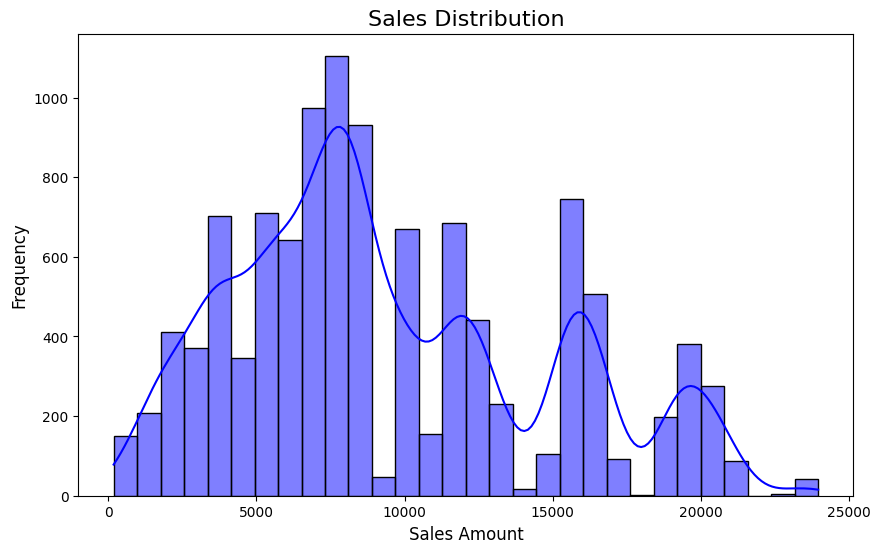

In [ ]:
# Sales distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True, color='blue', bins=30)
plt.title('Sales Distribution', fontsize=16)
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


anaylise above graph and give some description about that

The code analyzes sales data to identify trends across different categories.  Here's a breakdown of the visualizations and insights they provide:

**1. Sales by Product Category:**

* **Bar Chart:** This chart shows the total sales amount for each product category.  It helps identify the best-selling product categories and those that need more attention.  For example, if "Clothing" shows significantly higher sales than "Electronics," it suggests a stronger market demand for clothing items. The `viridis` color palette adds visual appeal.

**2. Sales by Gender:**

* **Bar Chart:** This chart compares total sales between different genders. It reveals whether one gender contributes more to overall sales. For instance, if female sales are considerably higher, marketing strategies might be adjusted to better target this segment.

**3. Sales by Age Group:**

* **Bar Chart:** This visualization reveals sales trends across various age groups.  It can help businesses understand which age demographics are their primary customers.  This is crucial for targeted advertising and product development.  For example, if the "25-34" age group demonstrates the highest sales, marketing efforts could be focused on that demographic.

**4. Sales by Marital Status:**

* **Pie Chart:** This chart displays the proportion of sales contributed by each marital status category. It shows the relative market share of different customer groups based on marital status, which might be used to tailor promotions.

**5. Sales Distribution:**

* **Histogram:**  This plot visualizes the distribution of sales amounts.  The x-axis represents the sales amount, and the y-axis indicates the frequency of sales falling within each bin.  This helps to understand the typical sales values, identify outliers, and reveal the overall shape of the sales data.  The kde (kernel density estimate) overlay provides a smooth representation of the distribution.

**Overall Insights and Potential Applications:**

The combination of these charts provides a comprehensive overview of sales performance. This information can guide strategic decision-making.  For example:

* **Product Development:**  Invest in product lines within high-performing product categories or improve underperforming categories.
* **Marketing Campaigns:** Target specific demographics (gender, age, marital status) with personalized promotions.
* **Inventory Management:** Optimize stock levels based on sales trends for various product categories.
* **Pricing Strategies:**  Consider adjustments to pricing strategies based on the sales distribution.  For example, if there are many low sales amounts and few very high ones, there might be an opportunity to increase average sales with different pricing models.

**Dash Dashboard:**

The code also integrates these visualizations into an interactive dashboard using Dash, making the analysis more accessible and engaging.  Users can interact with the different charts in the dashboard.


The analysis provides valuable insights into customer behavior and preferences, facilitating better business strategies.